# Self Organising Map (SOM) - Credit Card Fraud Detection

A SOM model built using data from a course on Udemy called [Deep Learning A-Z](https://www.udemy.com/course/deeplearning/learn/lecture/6744454#overview). The model uses the Statlog (Australian Credit Approval) dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval) which contains a list of credit card applications that were approved and rejected.

The aim of this model is to build a clustered map of credit card applications based on features in the dataset. The outliers in this map may help to identify the traits of fraudulent applications.

<br></br>
***
## Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

# Use the minisom library to build the SOM (Source: https://github.com/JustGlowing/minisom?tab=readme-ov-file)
!pip install minisom
from minisom import MiniSom

from pylab import bone, pcolor, colorbar, plot, show

<br></br>
***
## Data Preprocessing

In [18]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
print("The 'Class' column indicates which applications were accepted (1) or rejected (0)")
print(dataset)

# Store customer data in X
X = dataset.iloc[:, :-1].values
print(X)

# Store application status in y
y = dataset.iloc[:, -1].values

# Normalisation
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print(X)

The 'Class' column indicates which applications were accepted (1) or rejected (0)
     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2

<br></br>
***
## Building & Training the SOM

In [19]:
som = MiniSom(x = 10, y = 10,                  # Arbitrarily chosen dimensions for the SOM
              input_len = X.shape[1],          # Number of features in the dataset
              sigma = 1.0,                     # Cluster radius         
              learning_rate = 0.5)             # Amount by which weights are incremented on each iteration

som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

<br></br>
***
## Visualisation

Squares: Approved  Circles: Rejected  White cells: Outliers


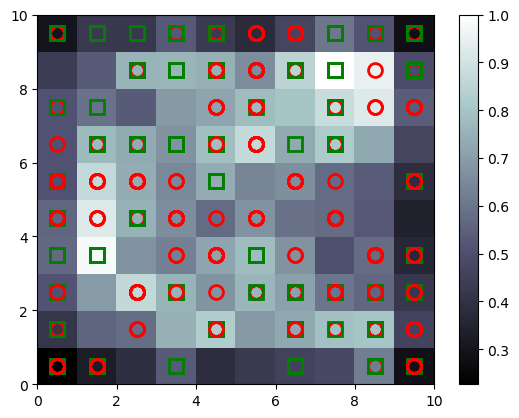

In [20]:
# Window to display the SOM
bone()

# Obtain the mean inter-neuron distances and plot them
distanceMap = som.distance_map().T
pcolor(distanceMap)

# Print a legend for each color on the plot
colorbar()

# Add markers to indicate which customer (and their associated neuron) was approved/rejected
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    applicationStatus = y[i]
    plot(w[0] + 0.5,                                    # Place marker at the centre of the square on the grid
         w[1] + 0.5,
         markers[applicationStatus],
         markeredgecolor = colors[applicationStatus],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

print("Squares: Approved  Circles: Rejected  White cells: Outliers")
show()

<br></br>
***
## Identifying outliers as potentially fraudulent customers

In [22]:
# Identify neurons that are above a threshold by iterating over the distance map
threshold = 0.95
neuronsAboveThreshold = []
for i in range(distanceMap.shape[0]):
    for j in range(distanceMap.shape[1]):
        if distanceMap[i, j] >= threshold:
            neuronsAboveThreshold.append((i, j))

print("Neurons above threshold: ", neuronsAboveThreshold)


mappings = som.win_map(X)
# Create an array to hold a list of normalised customer numbers
frauds = []
for neuron in neuronsAboveThreshold:
    customers = mappings[neuron]
    
    for customer in customers:
        frauds.append(customer)

frauds = sc.inverse_transform(frauds)
fraudulentCustomerNumbers = []
for customerDetails in frauds:
    fraudulentCustomerNumbers.append(customerDetails[0])
print("Fraudulent customers:", fraudulentCustomerNumbers)

Neurons above threshold:  [(3, 1), (8, 7)]
Fraudulent customers: [15631451.0, 15660871.0]
